In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split # Veri kümesini bölümlemek için
# Sol tarafta dosyalar sekmesinde sample_data klasörü altındaki
# Colab ortamnın sağladığı veri kümelerine erişim
data = pd.read_csv("sample_data/california_housing_test.csv")
# print('Dataframe ilk 5 veri: \n',data.head())

X = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms']]
y = data['median_income']

# Yüklenen veri kümesi rastgele örnekleme ile test ve training kümelerine
# ayrılabilir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Eğitim kümesi giriş verileri: \n',X_train)
print('Test kümesi giriş verileri: \n',X_test)

print('Veri Kümesi Bölümlemesi: \n')
print('Eğitim kümesi büyüklüğü: \n',len(X_train))
print('Test kümesi büyüklüğü: \n',len(X_test))
#DENEY:
# %10, %30 ve %50 oranlarında eğitim ve test kümesi oluşturunuz


Eğitim kümesi giriş verileri: 
       longitude  latitude  housing_median_age  total_rooms
642     -118.32     34.09                28.0       2173.0
700     -118.46     34.17                24.0       2814.0
226     -117.86     33.72                31.0       1194.0
1697    -118.14     34.03                38.0       1447.0
1010    -122.41     37.61                46.0       2975.0
...         ...       ...                 ...          ...
1638    -121.81     37.25                 5.0       1975.0
1095    -118.38     34.06                29.0       3946.0
1130    -117.80     34.15                14.0       7876.0
1294    -122.25     38.16                17.0       4459.0
860     -118.43     34.01                43.0       1487.0

[2400 rows x 4 columns]
Test kümesi giriş verileri: 
       longitude  latitude  housing_median_age  total_rooms
1801    -121.68     37.93                44.0       1014.0
1190    -117.28     34.26                18.0       3895.0
1817    -122.10     37.61   

Eğitim kümesi veri başına hatalar: 
 642    -1.691844
700     0.289478
226    -0.640486
1697    1.067458
1010   -0.482582
          ...   
1638    1.060246
1095   -1.648061
1130    1.155204
1294   -1.767738
860     2.292757
Name: median_income, Length: 2400, dtype: float64
Eğitim Kümesi Ortalama Mutlak Hata (MAE): 1.3175
Eğitim Kümesi Ortalama Kare Hata (MSE): 3.2362
Eğitim kümesi veri başına hatalar: 
 1801   -1.642111
1190   -0.967372
1817    0.558322
251    -0.118766
2505   -0.301169
          ...   
104    -1.807264
2087    0.420952
599    -0.918209
1756    1.897241
1323    0.155438
Name: median_income, Length: 600, dtype: float64
Test Kümesi Üzerinde Ortalama Mutlak Hata (MAE): 1.3342
Test Kümesi Üzerinde Ortalama Kare Hata (MSE): 3.5127


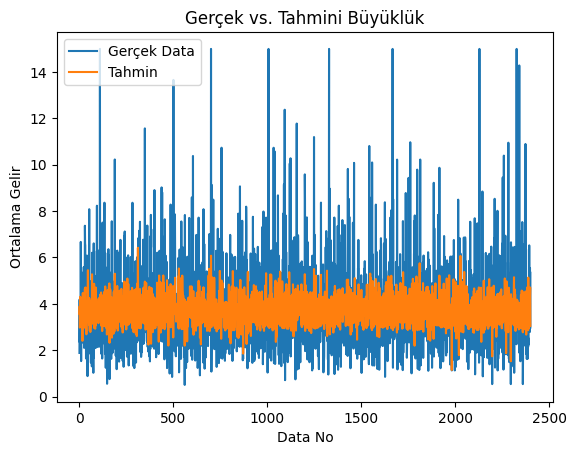

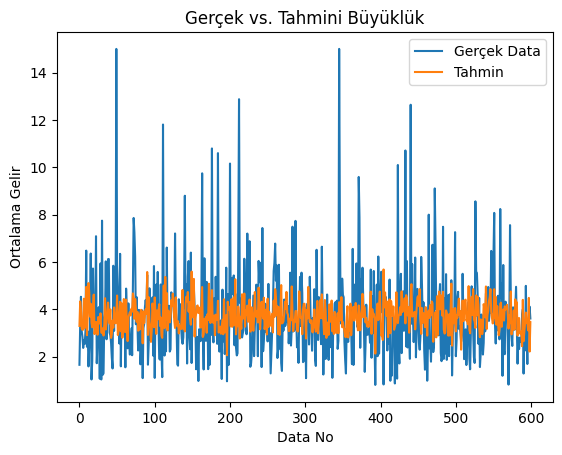

In [2]:
# Şimdi yapay sinir ağı ile tahmin modeli geliştirelim.
# Gerekli bazı kütüphaneler ve metodlar yüklenmeli
from sklearn.neural_network import MLPRegressor  # Çok katmanlı yapay sinir ağını regresyon uygulaması için
from sklearn.metrics import mean_absolute_error, mean_squared_error # regresyon performansı hesaplamaları için
import matplotlib.pyplot as plt  # çizim işlemleri için

# MLPRegressor önemli parametreler: activation: str = "relu", *, solver: str = "adam",
# alpha: float = 0.0001 (Regulasyon katsayısı, ağırlıkların minimizasyonu sağlayarak genellemeye katkı sağlar)
# batch_size: str = "auto", learning_rate: str = "constant", learning_rate_init: float = 0.001,
# validation_fraction: float = 0.1
# Aktivasyon fonksiyonu seçenekleri activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# Optimizasyon algortiması seçenekleri solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
# Diğer parametreleriçin https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
model = MLPRegressor(hidden_layer_sizes=(100,50,20), max_iter=1000, random_state=42, learning_rate_init= 0.001, validation_fraction= 0.2)

# modelin eğitim kümesi ile eğitimi için
h= model.fit(X_train, y_train)

# Model elde edildi. Şimdi Eğitim kümesi ve test kümesi performanslarını inceleyelim.

# Eğitim kümesi üzerinde tahmin yapılıyor.
y_pred_train = model.predict(X_train)
# Eğitim kümesi üzerinde performans ölçülüyor
Hata_train=y_train-y_pred_train
print('Eğitim kümesi veri başına hatalar: \n',Hata_train)
# Model performansını değerlendirelim
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Eğitim Kümesi Ortalama Mutlak Hata (MAE): {mae_train:.4f}')
print(f'Eğitim Kümesi Ortalama Kare Hata (MSE): {mse_train:.4f}')

# Test kümesi üzerinde tahmin yapılıyor.
y_pred_test = model.predict(X_test)
# Eğitim kümesi üzerinde performans ölçülüyor
Hata_test=y_test-y_pred_test
print('Eğitim kümesi veri başına hatalar: \n',Hata_test)
# Model performansını değerlendirelim
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Test Kümesi Üzerinde Ortalama Mutlak Hata (MAE): {mae_test:.4f}')
print(f'Test Kümesi Üzerinde Ortalama Kare Hata (MSE): {mse_test:.4f}')

# Eğitim kümesi veri ile tahmin verisini birlikte çizelim.
plt.plot(y_train.to_numpy())
plt.plot(y_pred_train)
plt.xlabel('Data No')
plt.ylabel('Ortalama Gelir')
plt.title('Gerçek vs. Tahmini Büyüklük')
plt.legend(['Gerçek Data','Tahmin'])
plt.show()

# Test kümesi veri ile tahmin verisini birlikte çizelim.
plt.plot(y_test.to_numpy())
plt.plot(y_pred_test)
plt.xlabel('Data No')
plt.ylabel('Ortalama Gelir')
plt.title('Gerçek vs. Tahmini Büyüklük')
plt.legend(['Gerçek Data','Tahmin'])
plt.show()

#DENEY:
# Test kümesi oranı %20 ve kalan %80 eğitim kümesi olsun.
# İyi bir genelleme sağlamak için eğitim kümesi ve test kümesi için
# hatalar yeterince düşük ve birbirine yakın değer almalı.
# Modelin ağ mimarisini (katmanlardaki nöron sayılarını) hidden_layer_sizes=(100,50,20)
# ile ayarlayınız. Bu modelin matematiksel karmaşıklığını değiştirecektir.
# Eğitim kümesi ve test kümesi ortalama performaslarını birbirine yaklaştırmaya
# çalışınız.

In [3]:
# [sicaklık Nem]=[1 3] için kayısı üreti tahmini
y_pred1 = model.predict([[-118.32,34.09,28.0, 2173.0]])
print('Tahmin :',y_pred1)

Tahmin : [3.57084372]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
